In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
customers = pd.read_csv("Data/customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
customers.info()
# important things are null value & data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


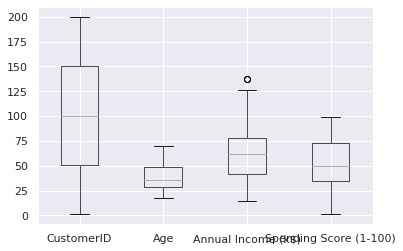

In [5]:
customers.boxplot()
plt.show()

Text(0, 0.5, 'S')

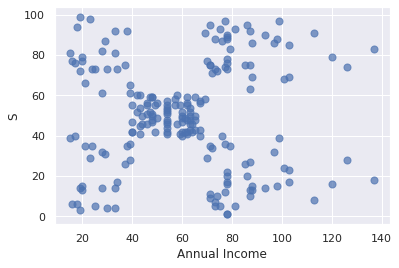

In [6]:
# compare income & spending scores
points = customers.iloc[:, 3:5].values
x = points[:,0]
y = points[:,1]

plt.scatter(x,y, s=50, alpha=0.7)
plt.xlabel("Annual Income")
plt.ylabel("S")

In [7]:
# Segment customer to 5 segment

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters= 5, random_state = 0)
kmeans.fit(points)

predicted_cluster_indexes = kmeans.predict(points)

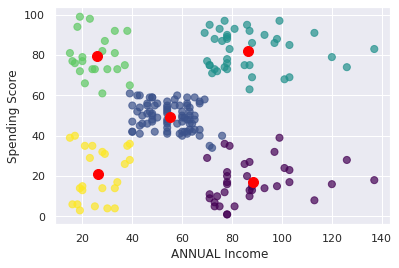

In [11]:
plt.scatter(x,y, c = predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel("ANNUAL Income ")
plt.ylabel("Spending Score")

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red", s=100)
plt.show()


In [13]:
df = customers.copy()
df["Cluster"] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [16]:
# Get the cluster index for a customer with a high income and low spending score
cluster = kmeans.predict(np.array([[120,20]]))[0]

# filter the df to include only customers in that cluster
clustered_df = df[df["Cluster"] == cluster]
clustered_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,125,Female,23,70,29,0
128,129,Male,59,71,11,0
130,131,Male,47,71,9,0
134,135,Male,20,73,5,0
136,137,Female,44,73,7,0
138,139,Male,19,74,10,0
140,141,Female,57,75,5,0
144,145,Male,25,77,12,0
146,147,Male,48,77,36,0
148,149,Female,34,78,22,0
